<a href="https://colab.research.google.com/github/JS-DS-coder/CienciaDeDatos2021/blob/master/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto Final**

Jairo Salazar

Carnet : 21000887 

***Parte I - Analisis exploratorio de Datos***

Se efectuo las siguientes operaciones:

1. Carga de librerias necesarias.
2. Dividir Dataset 80% de datos para entrenamiento, 20% restante para probar el modelo.
3. Analisis exploratorio, estadistico y de correlacion de los datos presentados de las casas.
4. Calculo de la Correlacion entre cada dimension del Modelo en relacion al Precio de Venta de las casas.
5. Analisis de la correlacion de las dimensiones de las casas.



 

In [1]:
#1. Carga de librerias necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.linear_model import LinearRegression





In [2]:
#2. Carga de datos y dividir dataset 80% para entreno y 20% para proabr el modelo.
def slicingDataset (ds,inicio,porcentaje):
  cantidad = int(np.round(ds.shape[0] * porcentaje,0))
  return ds[inicio:inicio+cantidad,0:6]
  
Dataset = np.load('proyecto_training_data.npy')
print (Dataset.shape)
dsEntrenamiento = slicingDataset(Dataset,0,0.80)  #dsEntrenamiento datos de entrenamiento
dsTest = slicingDataset(Dataset,int(dsEntrenamiento.shape[0])-1,0.20) #dsTest Valores de prueba
print (dsTest.shape)
print (dsEntrenamiento.shape)


(1460, 6)
(292, 6)
(1168, 6)


-------------------------------
       Precio de Venta
Media:  180590.27739726027
Valor Maximo:  755000.0
Valor Minimo:  34900.0
Rango:  720100.0
Desviacion Standard:  78781.95108033362
-------------------------------
       Overall Quality
Media:  6.101027397260274
Valor Maximo:  10.0
Valor Minimo:  1.0
Rango:  9.0
Desviacion Standard:  1.377435193240741
-------------------------------
       1st Floor SFT
Media:  1156.3236301369864
Valor Maximo:  3228.0
Valor Minimo:  334.0
Rango:  2894.0
Desviacion Standard:  373.620331503586
-------------------------------
       Total Rooms above grade
Media:  6.4854452054794525
Valor Maximo:  14.0
Valor Minimo:  2.0
Rango:  12.0
Desviacion Standard:  1.6084517167387253
-------------------------------
       Years Built
Media:  1971.451198630137
Valor Maximo:  2010.0
Valor Minimo:  1875.0
Rango:  135.0
Desviacion Standard:  29.93888206867768
-------------------------------
       Lot Frontage
Media:  69.94698544698545
Valor Maximo:  313.0
Valor Mi

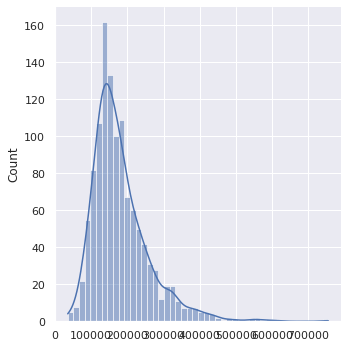

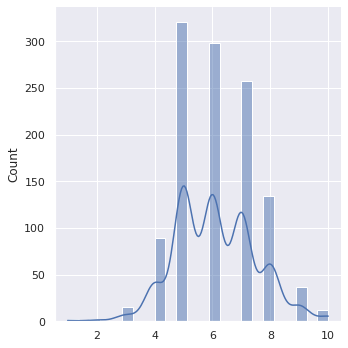

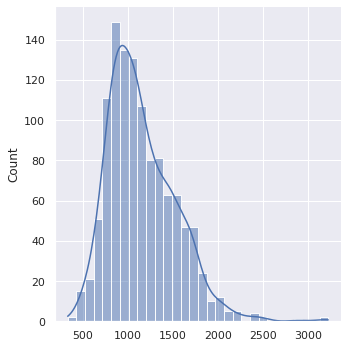

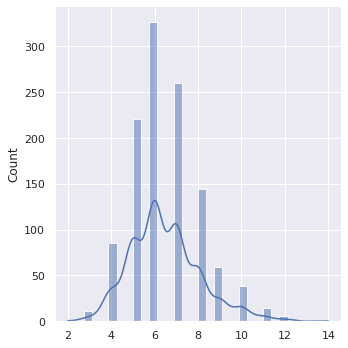

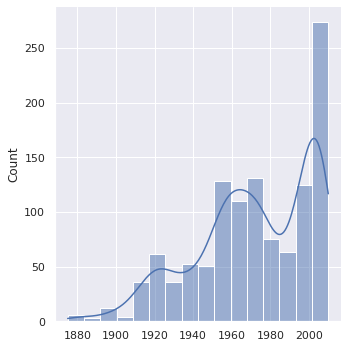

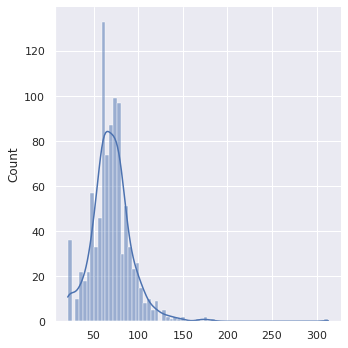

In [102]:
#3. Analisis Exploratorio de los datasets
#calculando media, valor maximo, valor minimo, rango, desviacion estandard.
def dimensiones (ds,columna,nombre):
  #Funcion que evalua cada variable en el dataset
  dimension = ds[0:ds.shape[0],columna-1:columna]

  dimension = dimension[np.logical_not(np.isnan(dimension))]
  media = np.mean(dimension)
  valmax = np.max(dimension)
  valmin = np.min(dimension)
  desvstd  = np.std(dimension)
  rango    = np.ptp(dimension)

  print('-------------------------------')
  print('      ', nombre)
  print ('Media: ',media)
  print ('Valor Maximo: ',valmax)
  print ('Valor Minimo: ',valmin)
  print ('Rango: ',rango)
  print ('Desviacion Standard: ',desvstd)
  #Graficar cada variable del dataset.
  sb.set_theme()
  #print(dimension.shape)
  sb.displot(dimension,kde=True)
 

#Calculando correlacion de Pearson de todo el modelo.
dsPanda = pd.DataFrame(data=dsEntrenamiento,columns=["precio","OverallQuality","1stFloorSQF","TotalRoomsabvgrnd","YearBuilt","lotfrontage"])
dsPanda.head()
corrpearson = dsPanda.corr(method="pearson")



#Evaluando cada dimension, imprimiendo analisis de cada una de las dimensiones del modelo.
dimensiones(dsEntrenamiento,1,"Precio de Venta")
dimensiones(dsEntrenamiento,2,"Overall Quality")
dimensiones(dsEntrenamiento,3,"1st Floor SFT")
dimensiones(dsEntrenamiento,4,"Total Rooms above grade")
dimensiones(dsEntrenamiento,5,"Years Built")
dimensiones(dsEntrenamiento,6,"Lot Frontage")
print(corrpearson)

***4. Correlacion de los datos***

A continuacion encontrara la correlacion entre las diferentes cualidades de las propiedades y el precio. 

Encontrara primero cada grafico de correlacion siendo Y = Precio, x = Cualquiera de las cinco caracteristicas del set de Datos: 

1. OverallQuality
2. 1stFlrSF
3. TotRmsAbvGrd
4. YearBuilt
5. LotFrontage

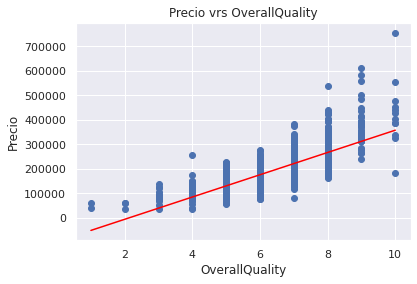

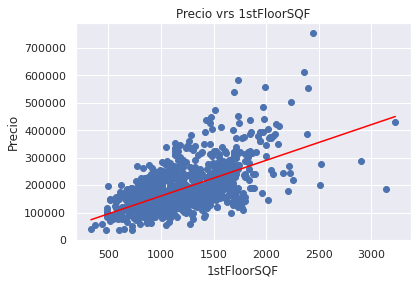

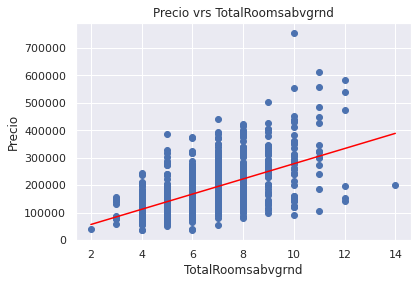

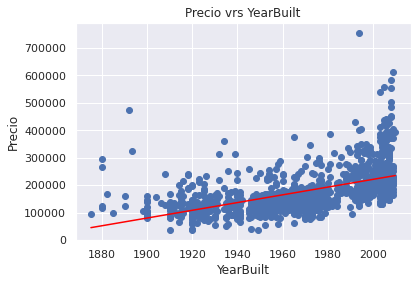

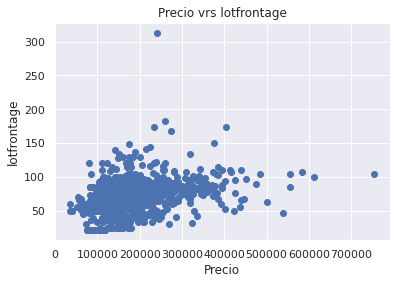

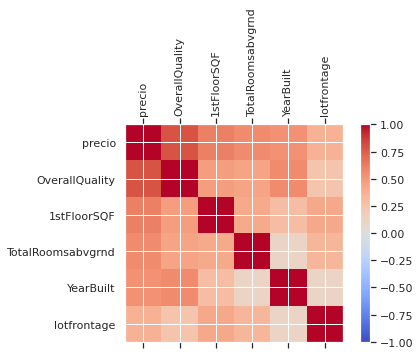

In [103]:
def GraficarCorrelacion (x,y,titulo,xtitulo,ytitulo,color1):
  plt.scatter(x,y)
  plt.title(titulo)
  plt.xlabel(xtitulo)
  plt.ylabel(ytitulo)
  plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color=color1)
  plt.show()





y = dsPanda['precio']
x = dsPanda['OverallQuality']

GraficarCorrelacion(x,y,'Precio vrs OverallQuality','OverallQuality','Precio','red')

x = dsPanda['1stFloorSQF']
GraficarCorrelacion(x,y,'Precio vrs 1stFloorSQF','1stFloorSQF','Precio','red')

x = dsPanda['TotalRoomsabvgrnd']
GraficarCorrelacion(x,y,'Precio vrs TotalRoomsabvgrnd','TotalRoomsabvgrnd','Precio','red')

x = dsPanda['YearBuilt']
GraficarCorrelacion(x,y,'Precio vrs YearBuilt','YearBuilt','Precio','red')

x = dsPanda['lotfrontage']

GraficarCorrelacion(y,x,'Precio vrs lotfrontage','Precio','lotfrontage','red')






fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corrpearson,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dsPanda.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dsPanda.columns)
ax.set_yticklabels(dsPanda.columns)
plt.show()










**5. Analisis de la Correlacion de los datos**

Las correlaciones de las dimensiones de las variables con el precio de venta se resumen a continuacion:

1. OverAllQuality    (Correlacion de Pearson: 0.793990)
2. 1stFloorSQF       (Correlacion de Pearson: 0.61629)
3. TotalRoomsabvgrnd (Correlacion de Pearson: 0.56471)
4. YearBuilt         (Correlacion de Pearson: 0.53417)
5. lotfrontage       (Correlacion de Pearson: 0.36329)

Analizando las graficas y los datos de la correlacion, se eligieron las varaiables OverAllQuality y 1stFloorSQF. Aunque las dimensiones de TotalRooms y YearBuilt, podrian tambien haberse elegido como segunda dimension, pues presentan una correlacion muy similar a la de 1stFloorSQF.

                    


**Parte II - Entrenamiento del Modelo**

Tomando las dos dimensiones a evaluar, OverAllQuality y 1stFloorSqf, se procedio a desarrollar una funcion de entrenamiento para obtener una ecuacion y = mx+b. Se fue probando con el modelo inicial, recomendado y se fue variando el learning rate y el numero de iteraciones (epoch) hasta llegar a reducir el error. Se observo lo siguiente para las dos dimensiones:

*1. OverallQuality: * epochs = 3900 lr = 0.01. Es lo mas cercano que se encontro para reducir el error, entre la iteracion 3900 y 4000 el error empezaba a aumentar y ya no se iba reduciendo. Por lo que se decidio dejarlo con estos parametros. Como veremos mas adelante la diferencia entre este valor y el calculado por el scikit es minimo.

*2. 1stFloorSqf: * epochs = 400 lr = 0.000001. Con estos parametros el error ya no se redujo para nada, de hecho a partir de la iteracion 200 la reduccion del error es bien marginal. por lo que se decidio dejar estos parametros.


-----OverAllQuality----
*Errores:
Iteracion 0   180590.27739726027
Iteracion 500   35265.6885567049
Iteracion 1000   34320.7279806564
Iteracion 1500   33859.253453765115
Iteracion 2000   33615.02454385437
Iteracion 2500   33503.25206704161
Iteracion 3000   33448.8460781579
Iteracion 3500   33429.79928793564
Graficando Rectas vrs Correlacion:


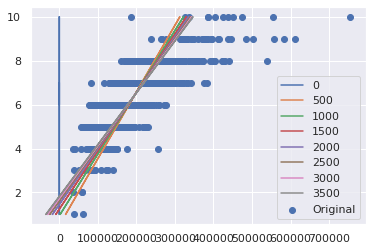

-Graficando Error por iteracion:


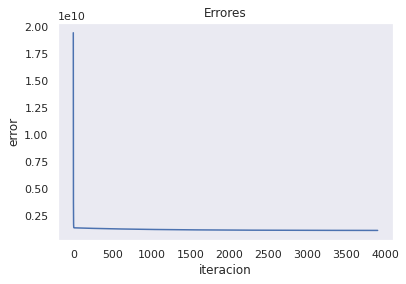

-----1stFloorSQF----
*Errores:
Iteracion 0   180590.27739726027
Iteracion 50   46465.47705036209
Iteracion 100   46465.472930503005
Iteracion 150   46465.46881066339
Iteracion 200   46465.46469084326
Iteracion 250   46465.4605710426
Iteracion 300   46465.456451261394
Iteracion 350   46465.45233149968
Iteracion 400   46465.44821175743
Graficando Rectas vrs Correlacion:


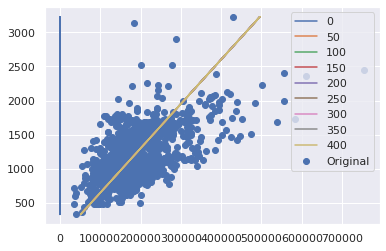

-Graficando Error por iteracion:


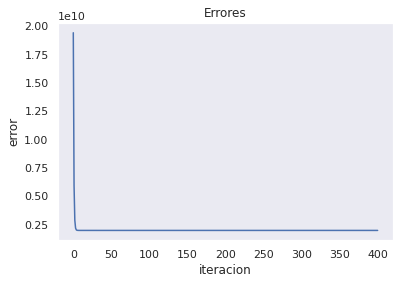

In [109]:
def PlotError (ploterror):
  fig, ax = plt.subplots()
  ax.plot(ploterror["iteracion"], ploterror["error"])
  ax.set(xlabel='iteracion', ylabel='error',
       title='Errores')
  ax.grid()
  plt.show()

def CalcularError(yorig,ycalc):
  return (0.5 *(np.average(np.power((yorig-ycalc),2))))

# Modelo
def FuncRegLineal (varx,vary,epochs,imprimir_error_cada,lr,valorMB):


  dsmatrix = varx
  erroriteracion = np.empty((0,2),np.double)
  scatterplot = vary
  i=0
  Resultado = {"iteracion":[],"lista":[]}
  plt.scatter(vary,varx,label="Original")
  while (i <= epochs):
    yhat = (varx*valorMB[0]) + valorMB[1] # y = mx + b
    error = CalcularError(vary,yhat) # Calculando el error
    gradientem = np.average((yhat-vary)*varx) #gradiente m
    gradienteb = np.average((yhat-vary)) # Gradiente b
    valorMB[0]=valorMB[0] - (lr*gradientem) # nuevo valor M
    valorMB[1]=valorMB[1] - (lr*gradienteb) # nuevo valor b
    Resultado["iteracion"].append(i)  #Numero de Iteracion y datos asociados a la iteracion
    Resultado["lista"].append({'m' : valorMB[0],
                               'b' : valorMB[1],
                               'gradientem' : gradientem,
                               'gradienteb' : gradienteb,
                               'error' : error})
    erroriteracion = np.append(erroriteracion,np.array([[i,error]]),axis=0) #Grabando el error de la iteracion
    if (i%imprimir_error_cada==0): #Imprimiendo recta
      plt.plot(yhat,varx,label=i)
      #Imprimiendo Error
      print("Iteracion",i," ",np.average(np.abs(vary-yhat)))
    i+=1
  #Mostrando grafica con las rectas y = Mx+b y scatterplot original
  plt.legend()
  print('Graficando Rectas vrs Correlacion:')
  plt.show()  
  #Graficando error
  print("-Graficando Error por iteracion:")
  dsError = pd.DataFrame(data=erroriteracion,columns=["iteracion","error"])
  PlotError(dsError)

  return Resultado

rectaOQ = [0,0]
print ("-----OverAllQuality----")
print ("*Errores:")
zz= FuncRegLineal(dsEntrenamiento[0:1460,1:2],dsEntrenamiento[0:1460,0:1],3900,500,0.01,rectaOQ)

recta1sqf = [0,0]
print ("-----1stFloorSQF----")
print ("*Errores:")
zz1 = FuncRegLineal(dsEntrenamiento[0:1460,2:3],dsEntrenamiento[0:1460,0:1],400,50,0.000001,recta1sqf)




**Parte III - Evaluacion del Modelo**

Se guardo en la parte II en dos vectores, los factores finales de la recta (m y b) con la que se entrenaron los factores. Los vectores son:


*   rectaOQ (valores m y b finales de OverAllQuality)
*   recta1sqf (valores m y b finales de 1stFloorSQF)

Se creo la funcion EvaluarxEntrenada con los parametros de m y b obtenidos en el entreanimiento, esta recibe como parametro el valor de x y devuelve el valor de y, de forma vectorizada.

Se creo la funcion Evaluarx, que recibe como parametro x y el y real, y calcula los vectores de y entrenada y y bajo la LinearRegression y devuelve el error obtenido de ambas evaluaciones. El mismo se grafica al final.



   Caracteristica        TipoError         Valor
0  OverAllQuality  ErroryEntrenada  1.320219e+09
1  OverAllQuality     ErrorysciKit  1.314617e+09
2    1stFloorSqft  ErroryEntrenada  2.435478e+09
3    1stFloorSqft     ErrorysciKit  2.289697e+09


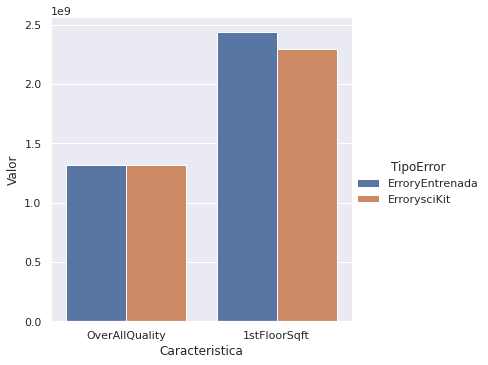

In [110]:
def EvaluarxEntrenada (x,recta):
  yret = (x*recta[0]) + recta[1]

  return yret 



def Evaluarx (x,y,recta,yscikit,caracteristica,merror):
  dsEvx = pd.DataFrame(data=x,columns=["X"])
  dsEvx["y"] = y
  yhatE = EvaluarxEntrenada(x,recta)
  dsEvx["yhat"]  = yhatE
  dsEvx["ysKit"] = yscikit.predict(x)
  dsEvx["promedio"] = (dsEvx["yhat"]+dsEvx["ysKit"])/2 
  errory = CalcularError(y,yhatE)
  erroryskit = CalcularError(y,yscikit.predict(x))
  merror[0][caracteristica] = errory 
  merror[0][caracteristica+1] = erroryskit

#estas lineas solo sirve para guardar los errores para la grafica final.
lst = ['OverAllQuality','OverAllQuality','1stFloorSqft','1stFloorSqft']
pandaError = pd.DataFrame(lst,columns=["Caracteristica"])
pandaError["TipoError"] = ['ErroryEntrenada','ErrorysciKit','ErroryEntrenada','ErrorysciKit']
diccError = np.zeros((1,4))

# Se utiliza la funcion LinearRegresion para la dimension OverAllQuality con los datos de entrenamiento.           
reg = LinearRegression().fit (dsEntrenamiento[0:1460,1:2],dsEntrenamiento[0:1460,0:1])
#evaluo la recta entrenada vrs la funcion de regresion lineal. ya con los datos de TEST.
Evaluarx(dsTest[0:292,1:2],dsTest[0:292,0:1],rectaOQ,reg,0,diccError)

#se utiliza la funcion LinearRegresion para la dimension 1stFloorSQF con los datos de entrenamiento
reg = LinearRegression().fit (dsEntrenamiento[0:1460,2:3],dsEntrenamiento[0:1460,0:1])
#Evaluo la recta entrenada vrs la funcion de regresion lineal ya con los datos de test.
Evaluarx(dsTest[0:292,2:3],dsTest[0:292,0:1],recta1sqf,reg,2,diccError)
pandaError["Valor"] = np.transpose(diccError)
#pandaError = pd.DataFrame(diccError)
print(pandaError)
sb.catplot(data=pandaError,x="Caracteristica",y="Valor",hue="TipoError",kind="bar")
#sb.histplot(pandaError,x="Caracteristica",hue="TipoError",y="Valor",multiple='stack',shrink=.8)




**Parte IV - Conclusiones**

Bajo la perspectiva de errores y con las rectas entrenadas obtenidas, ambas dimensiones presentan menos errores bajo la funcion LinearRegression de Scikit. En el caso de OverAllQuality la diferencia entre ambos metodos es bastante marginal a diferencia de la dimension 1stFloorSQF en la que la diferencia es mayor. 

Aunque el proyecto era para practicar python, para este set de datos se recomienda evaluar otro tipo de correlaciones, ademas de la pearson, pues otras dimensiones presentaban una mayor correlacion bajo otros metodos, pero con el tiempo limitado ya no dio tiempo a evaluarlos bajo estas perspectivas. 